In [38]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import time
from datetime import datetime

In [67]:
# Import additional dependencies
from citipy import citipy

import requests

# Import the API key from config.py
from config import weather_api_key

# Import linregress
from scipy.stats import linregress

In [40]:
# starting URL for weathermap API call (from OpenWeather documentation)
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key

In [41]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) # zip() packs lats and lngs in pairs
lat_lngs

In [42]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs) # unzips lat_lngs

In [43]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination using .nearest_city() and .city_name
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

591

In [44]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | algiers
Processing Record 2 of Set 1 | jambi
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | evensk
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | koungou
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | kambove
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | crestview
Processing Record 20 of Set 1 | clonakilty
Processing Record 21 of Set 1 | coquimbo
Processing Record 22 of Set 1 | attawapiskat
City not 

Processing Record 40 of Set 4 | reforma
Processing Record 41 of Set 4 | bredasdorp
Processing Record 42 of Set 4 | yuci
Processing Record 43 of Set 4 | saint-francois
Processing Record 44 of Set 4 | saleaula
City not found. Skipping...
Processing Record 45 of Set 4 | bilma
Processing Record 46 of Set 4 | praya
Processing Record 47 of Set 4 | havre-saint-pierre
Processing Record 48 of Set 4 | cacule
Processing Record 49 of Set 4 | avanigadda
Processing Record 50 of Set 4 | biltine
Processing Record 1 of Set 5 | rio do sul
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | padang
Processing Record 4 of Set 5 | zaozerne
Processing Record 5 of Set 5 | guozhen
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | eskasem
City not found. Skipping...
Processing Record 8 of Set 5 | samarai
Processing Record 9 of Set 5 | longyearbyen
Processing Record 10 of Set 5 | erzin
Processing Record 11 of Set 5 | constitucion
Processing Record 12 of Set 5 | naze
Proces

Processing Record 25 of Set 8 | del rio
Processing Record 26 of Set 8 | safwah
City not found. Skipping...
Processing Record 27 of Set 8 | aromashevo
Processing Record 28 of Set 8 | kumano
Processing Record 29 of Set 8 | broome
Processing Record 30 of Set 8 | romitan
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | lisakovsk
Processing Record 33 of Set 8 | bireun
Processing Record 34 of Set 8 | kalmunai
Processing Record 35 of Set 8 | guajara-mirim
City not found. Skipping...
Processing Record 36 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 37 of Set 8 | skelleftea
Processing Record 38 of Set 8 | yerbogachen
Processing Record 39 of Set 8 | najran
Processing Record 40 of Set 8 | port macquarie
Processing Record 41 of Set 8 | kantunilkin
Processing Record 42 of Set 8 | manbij
Processing Record 43 of Set 8 | gaogou
Processing Record 44 of Set 8 | vologda
Processing Record 45 of Set 8 | ampanihy
Processing Record 46 of Set 8 | ringebu
Proces

Processing Record 13 of Set 12 | whitehorse
Processing Record 14 of Set 12 | tambopata
Processing Record 15 of Set 12 | flin flon
Processing Record 16 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 17 of Set 12 | manzil tamim
City not found. Skipping...
Processing Record 18 of Set 12 | bilibino
Processing Record 19 of Set 12 | nyurba
Processing Record 20 of Set 12 | haibowan
City not found. Skipping...
Processing Record 21 of Set 12 | masingbi
Processing Record 22 of Set 12 | martapura
Processing Record 23 of Set 12 | victoria
Processing Record 24 of Set 12 | puro
Processing Record 25 of Set 12 | formby
Processing Record 26 of Set 12 | mubi
Processing Record 27 of Set 12 | zeya
Processing Record 28 of Set 12 | aquiraz
Processing Record 29 of Set 12 | liaozhong
Processing Record 30 of Set 12 | ocean city
Processing Record 31 of Set 12 | xacmaz
Processing Record 32 of Set 12 | vuktyl
Processing Record 33 of Set 12 | arlit
Processing Record 34 of Set 12 | dawlatabad
Pro

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# format & rearrange
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [53]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Algiers,DZ,2022-05-21 02:04:38,36.7525,3.0420,287.05,94,0,0.51
1,Jambi,ID,2022-05-21 02:00:19,-1.6000,103.6167,297.77,95,98,2.61
2,Hermanus,ZA,2022-05-21 01:59:20,-34.4187,19.2345,286.79,74,46,2.16
3,Rikitea,PF,2022-05-21 01:59:36,-23.1203,-134.9692,296.54,77,9,3.48
4,Albany,US,2022-05-21 02:02:17,42.6001,-73.9662,293.00,82,100,1.34
5,Cherskiy,RU,2022-05-21 02:03:21,68.7500,161.3000,287.45,37,12,6.03
6,Evensk,RU,2022-05-21 02:04:39,61.9500,159.2333,280.81,65,82,6.81
7,Ribeira Grande,PT,2022-05-21 02:00:38,38.5167,-28.7000,290.93,97,100,4.00
8,Koungou,YT,2022-05-21 02:04:40,-12.7336,45.2042,296.99,94,0,3.09
9,Port Alfred,ZA,2022-05-21 01:59:20,-33.5906,26.8910,289.36,71,100,2.12


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting

latitudes = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

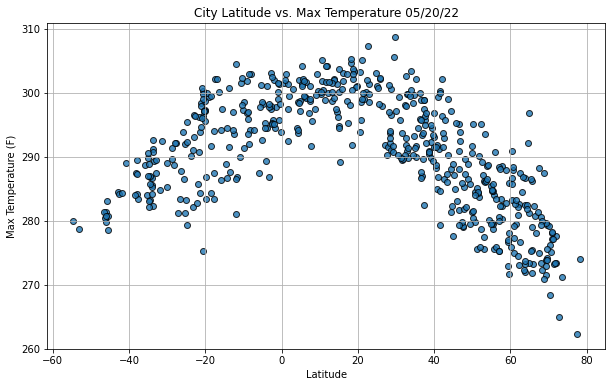

In [59]:
# Build the scatter plot for latitude vs. max temperature.
plt.subplots(figsize=(10, 6)) # make it big

plt.scatter(latitudes,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

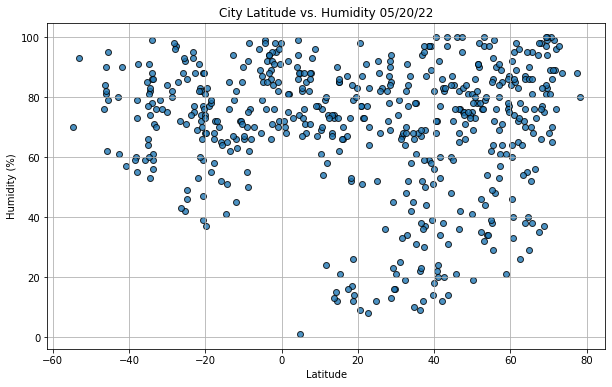

In [61]:
# Build the scatter plots for latitude vs. humidity.
plt.subplots(figsize=(10, 6)) # make it big

plt.scatter(latitudes,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

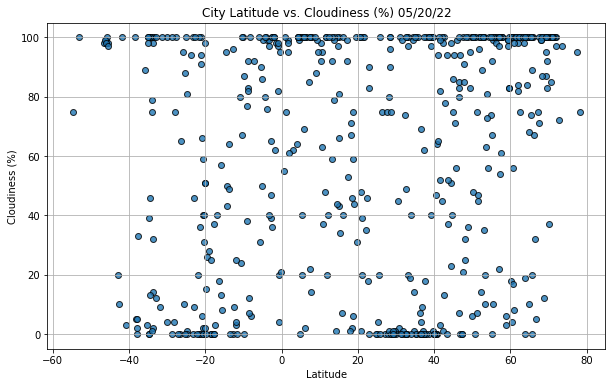

In [63]:
# Build the scatter plots for latitude vs. cloudiness.
plt.subplots(figsize=(10, 6)) # make it big

plt.scatter(latitudes,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

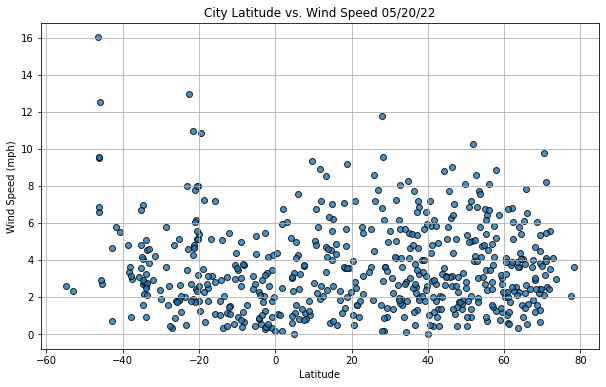

In [66]:
# Build the scatter plots for latitude vs. wind speed.
plt.subplots(figsize=(10, 6)) # make it big
plt.scatter(latitudes,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [68]:
# Create a function to create a plot & perform linear regression on the weather data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [76]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

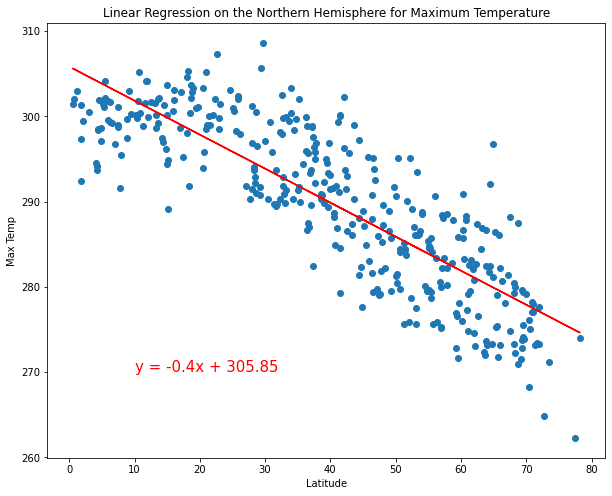

In [120]:
# Linear regression on the Northern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,270))

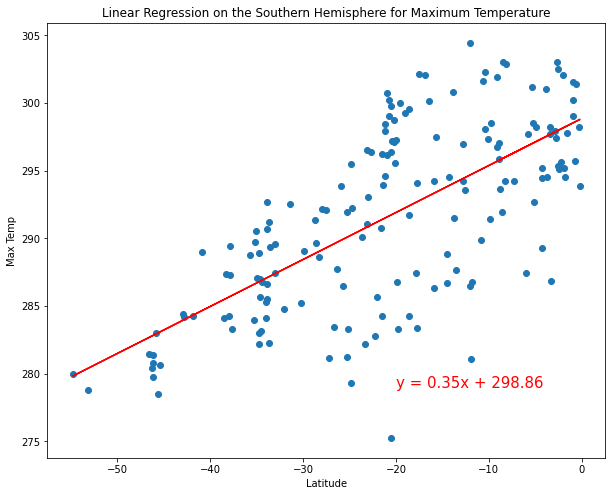

In [121]:
# Linear regression on the Southern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-20,279))

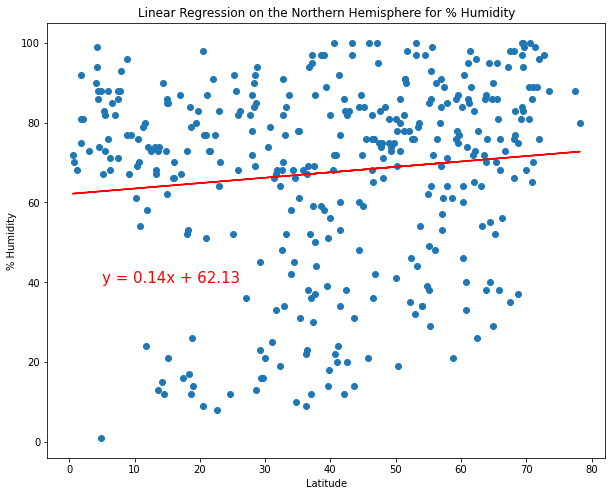

In [122]:
# Linear regression on the Northern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(5,40))

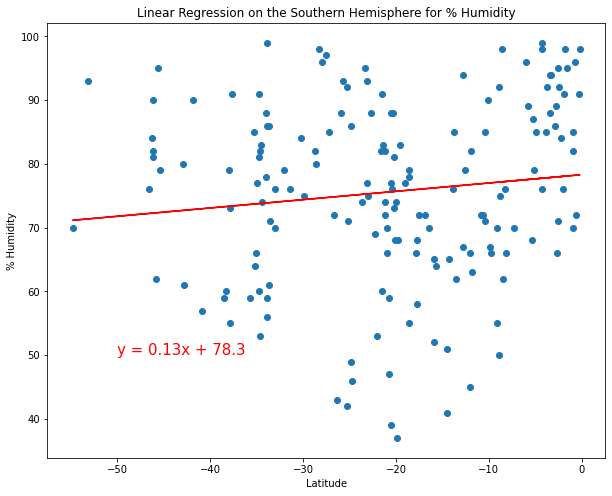

In [123]:
# Linear regression on the Southern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,50))

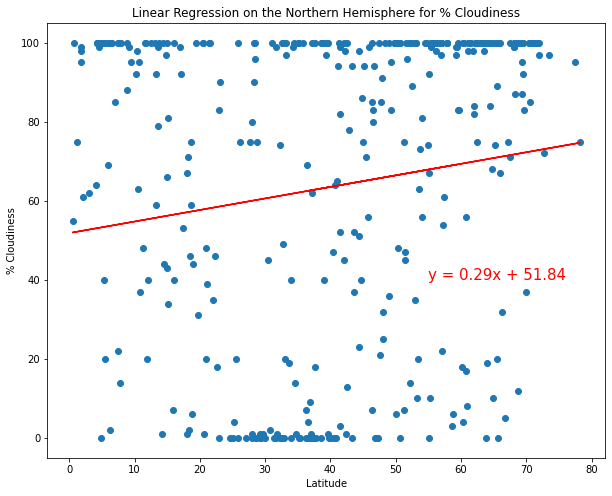

In [124]:
# Linear regression on the Northern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(55,40))

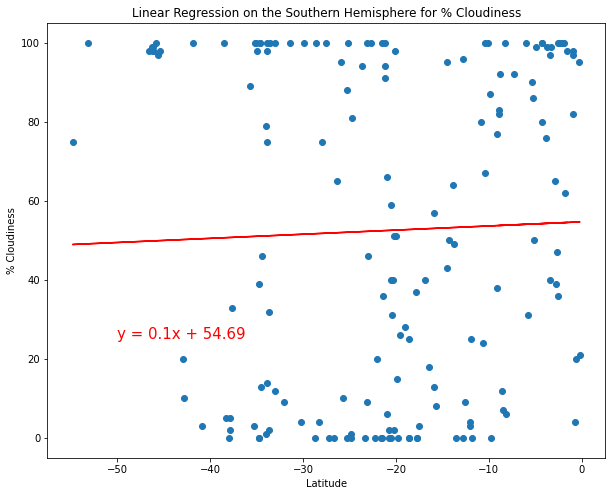

In [125]:
# Linear regression on the Southern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,25))

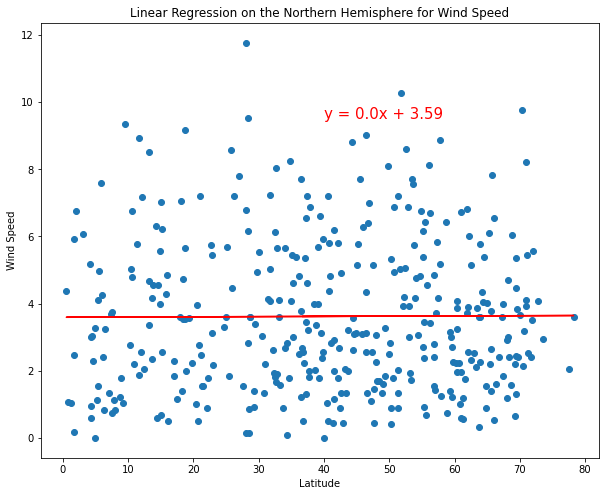

In [126]:
# Linear regression on the Northern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,9.5))

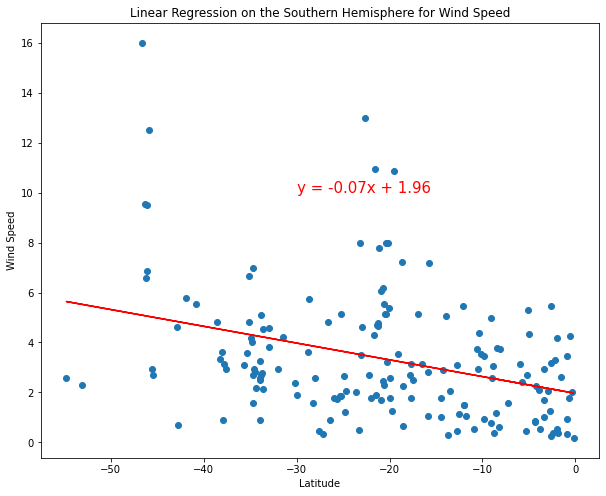

In [127]:
# Linear regression on the Southern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,10))